In [7]:
%run ./setup/lab_utils_cls.ipynb

Declared various Utitily class utility methods


In [66]:
# field mapping 

present_columns = {
    "field1": "Wind Speed",
    "field2": "Wind Power Density (Watts/m^2)",
    "field4": "Air Density (kg/m^3)",
    "field5": "Temperature (F)"
}

missing_columns = {
    "field3":"Wind Power (Watts)",
    "field6":"Pressure (mmHg)"
}

In [2]:
data = Utils.load_data('../data/raw/all.parquet', 'parquet')

In [57]:
test_1 = Utils.load_data('../data/raw/field1.parquet', 'parquet')
test_2 = Utils.load_data('../data/raw/field2.parquet', 'parquet')
test_4 = Utils.load_data('../data/raw/field4.parquet', 'parquet')
test_5 = Utils.load_data('../data/raw/field5.parquet', 'parquet')

In [70]:
def load_and_merge_files(column_mapping: dict, dir: str, index_column: str, data_frame: pd.DataFrame = None):
        for file in Utils.get_files_in_directory(dir):
            filename, file_extension = os.path.splitext(file)
            file_path = Utils.get_path_to_file(filename, file_extension, dir)
            data = pd.read_parquet(file_path)
            data = data.rename(
                columns={"created_at": index_column, filename: column_mapping[filename]})

            data[index_column] = pd.to_datetime(data[index_column])
            data = data.sort_values(by=index_column).reset_index(drop=True)

            data_frame = data if data_frame is None else data_frame.merge(
                data, on=index_column, how='outer')

        data_frame[index_column] = pd.to_datetime(data_frame[index_column])
        data_frame = data_frame.sort_values(by=index_column).reset_index(drop=True)

        return data_frame

In [71]:
data_full = load_and_merge_files(column_mapping=present_columns, dir='../data/raw', index_column='Datetime')

ArrowInvalid: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

In [61]:
test_1

,created_at,field1
0,2023-01-25T00:00:03Z,4.7
1,2023-01-25T00:01:03Z,3.3
2,2023-01-25T00:02:04Z,4.4
3,2023-01-25T00:03:04Z,2.7
4,2023-01-25T00:04:04Z,3.5
...,...,...
1435,2023-05-31T23:55:09Z,0.8
1436,2023-05-31T23:56:09Z,0.3
1437,2023-05-31T23:57:09Z,0.2
1438,2023-05-31T23:58:09Z,0.3


In [56]:
test_2

,created_at,field4
0,2023-05-01T00:00:53Z,0.04778940549299183
1,2023-05-01T00:01:53Z,0.04778940549299183
2,2023-05-01T00:02:53Z,0.047754366121980654
3,2023-05-01T00:03:53Z,0.047754366121980654
4,2023-05-01T00:04:53Z,0.047754366121980654
...,...,...
1435,2023-01-13T23:55:57Z,0.04832524768083674
1436,2023-01-13T23:56:57Z,0.04832524768083674
1437,2023-01-13T23:57:57Z,0.04832524768083674
1438,2023-01-13T23:58:57Z,0.04835120892770979


In [62]:
test_4

,created_at,field4
0,2023-05-01T00:00:53Z,0.04778940549299183
1,2023-05-01T00:01:53Z,0.04778940549299183
2,2023-05-01T00:02:53Z,0.047754366121980654
3,2023-05-01T00:03:53Z,0.047754366121980654
4,2023-05-01T00:04:53Z,0.047754366121980654
...,...,...
1435,2023-01-13T23:55:57Z,0.04832524768083674
1436,2023-01-13T23:56:57Z,0.04832524768083674
1437,2023-01-13T23:57:57Z,0.04832524768083674
1438,2023-01-13T23:58:57Z,0.04835120892770979


In [63]:
test_5

,created_at,field5
0,2023-02-07T00:00:01Z,39.6
1,2023-02-07T00:01:01Z,39.5
2,2023-02-07T00:02:01Z,39.5
3,2023-02-07T00:03:01Z,39.5
4,2023-02-07T00:04:01Z,39.3
...,...,...
1435,2023-05-29T23:55:54Z,61.8
1436,2023-05-29T23:56:54Z,61.4
1437,2023-05-29T23:57:54Z,61.2
1438,2023-05-29T23:58:54Z,60.9


In [40]:
data

,Wind Power Density (Watts/m^2),Temperature (F),Wind Speed,Air Density (kg/m^3)
Datetime,,,,
2023-05-12T00:00:41Z,0.000000,71.7,0.0,0.046838
2023-05-12T00:01:41Z,0.000000,71.7,0.0,0.046838
2023-05-12T00:02:41Z,0.000000,71.7,0.0,0.046838
2023-05-12T00:03:41Z,0.000000,71.7,0.0,0.046838
2023-05-12T00:04:41Z,0.000000,71.7,0.0,0.046838
...,...,...,...,...
2023-05-20T23:55:47Z,0.031559,64.1,1.1,0.047422
2023-05-20T23:56:47Z,0.000000,64.1,0.0,0.047422
2023-05-20T23:57:47Z,0.001518,64.1,0.4,0.047422


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520168 entries, 0 to 520167
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Datetime                        520168 non-null  object
 1   Wind Power Density (Watts/m^2)  520168 non-null  object
 2   Temperature (F)                 520168 non-null  object
 3   Wind Speed                      520168 non-null  object
 4   Air Density (kg/m^3)            520168 non-null  object
dtypes: object(5)
memory usage: 19.8+ MB


In [4]:
data.set_index('Datetime', inplace=True)

In [5]:
data = data.apply(pd.to_numeric)

In [6]:
data.describe()

,Wind Power Density (Watts/m^2),Temperature (F),Wind Speed,Air Density (kg/m^3)
count,520168.000000,520168.000000,520168.000000,520168.000000
mean,2.079752,54.091851,2.089501,0.048493
std,8.660601,17.020587,2.651165,0.001737
min,0.000000,-10.200000,0.000000,0.044020
25%,0.000000,40.000000,0.000000,0.047074
50%,0.030610,54.000000,1.100000,0.048421
75%,0.970668,67.900000,3.400000,0.049826
max,1043.485902,102.300000,35.100000,0.056315


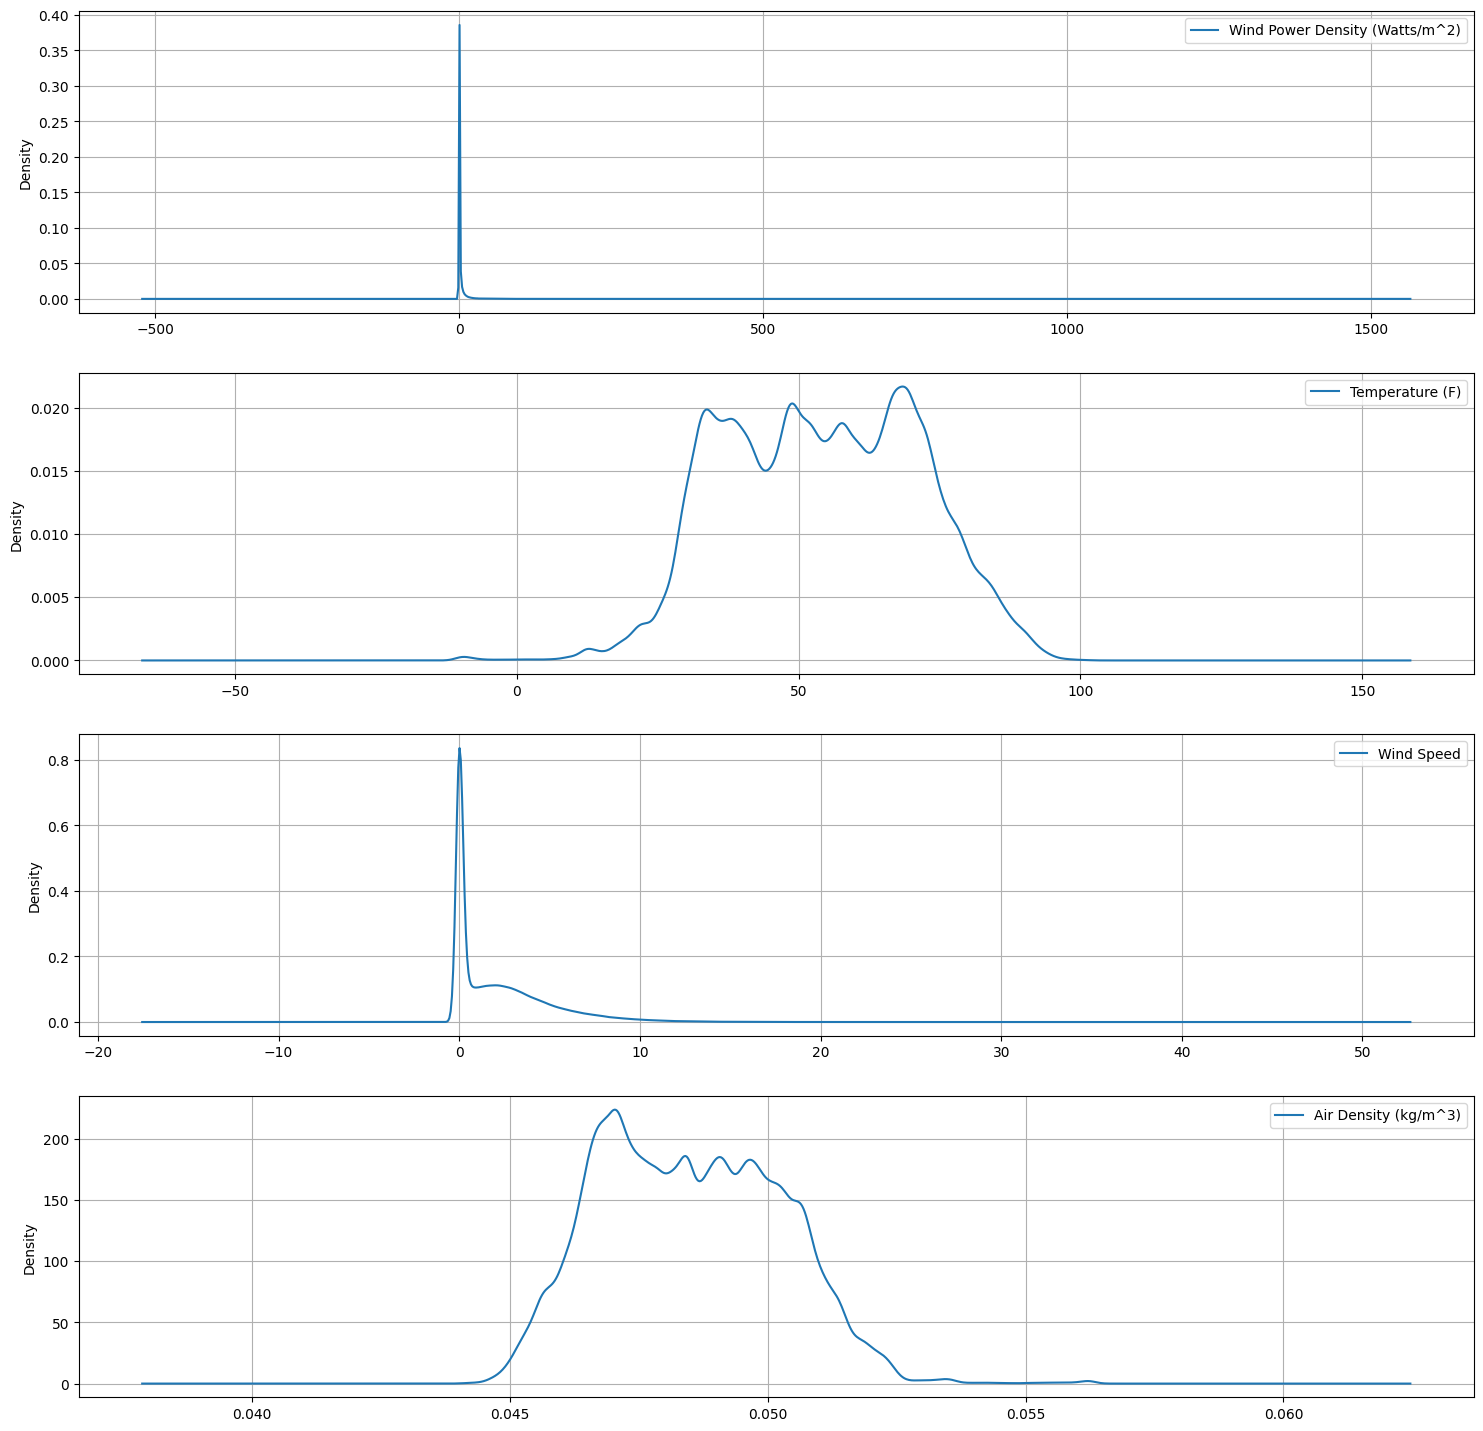

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18,18))
for i, col in enumerate(data.columns):
    data[col].plot(ax=axes[i], legend=True, grid=True, kind='density')

In [43]:
print(len(data.index))
for col in data.columns:
      print(data[col].nunique())

520168
268818
624
261
34265


In [47]:
duplicates = data[data.duplicated()]
duplicates

,Wind Power Density (Watts/m^2),Temperature (F),Wind Speed,Air Density (kg/m^3)
Datetime,,,,
2023-05-12T00:01:41Z,0.000000,71.7,0.0,0.046838
2023-05-12T00:02:41Z,0.000000,71.7,0.0,0.046838
2023-05-12T00:03:41Z,0.000000,71.7,0.0,0.046838
2023-05-12T00:04:41Z,0.000000,71.7,0.0,0.046838
2023-05-12T00:05:41Z,0.000000,71.7,0.0,0.046838
...,...,...,...,...
2023-05-20T23:52:47Z,0.000000,64.1,0.0,0.047438
2023-05-20T23:53:47Z,0.000000,64.1,0.0,0.047438
2023-05-20T23:56:47Z,0.000000,64.1,0.0,0.047422


In [ ]:
aaa

We have a physics based system of relationships among the variables. Wind power monitoring service provides 6 variables. Currently we only have 4 variables hisorical data. I assume I can attempt to derive the missing data from the available ones. However i believe this process heavily depends on the specific physics governing this semi closed system and the accuracy of the derived values may be innacurate.
I will consider some potential relationships based on common physics formulas:

<b>Wind Power (W)</b></br>
Wind power is often calculated using the following formula. Where A (cross sectional area - blade length) is on average 62.5 m length turbine blade. Since i have **wind speed** and **air density** i can attempt to derive wind power variables. 
$$
P = \dfrac{1}{2} \rho \pi A^{2} v^{3}
$$


<b>Pressure (mmHg))</b></br>
The relationship between temperature, air density, and pressure can be described by the **Ideal Gas Law**. I have **air density** measurments and **temperature** so i can attempt to derive pressure.
$$
PV = nRT
$$

<b>**Air Density**</b></br>
**Some addtional terms and definitions**<br>
Air mixture constant is 287.5 [J/kg]</br>
Atmospheric pressure and gauge pressure sum is absolute pressure <br>
Absolute temperature, also called thermodynamic temperature, is the temperature of an object on a scale where 0 is taken as absolute zero. At 0 K or −273oC, the volume of the gas becomes equal to zero . The gas ceases to exists. Hence, −273oC is the lowest possible temperature.
$$
\rho = \dfrac{p}{R \ T}
$$

 - p: absolute pressure
 - R: specific gas constant
 - T: absolute temperature

____________________
These are simplified physics based relationships and i assume that real world scenarios might involve more complex relationships. Also, errors that can propagate, so it's going to be essential to validate the derived values against actual measurements.